# Overfitting - regularyzacja

## Regularyzacja dla Regresji Liniowej

In [2]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

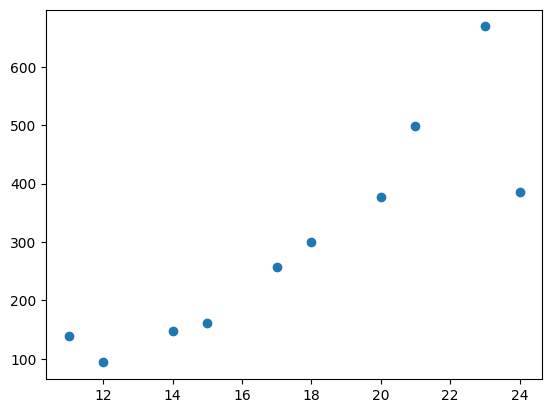

In [11]:
with open("./lin_reg_training.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
x_train = data[:, 0]
y = data[:, 1]
plt.scatter(x_train, y)

In [13]:
from sklearn.preprocessing import StandardScaler
 
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train.reshape(-1, 1))

# standard_scaler.fit(x_train)
# x_train = standard_scaler.transform(x_train)
# x_test = standard_scaler.transform(x_test)

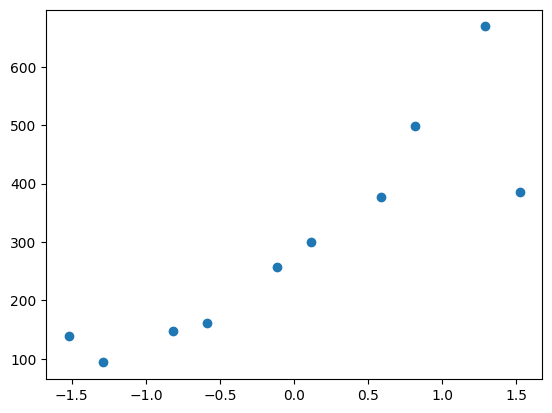

In [15]:
plt.scatter(x_train, y)

In [31]:
print(x_train.reshape(10,).shape)
train_set = np.zeros((10, 6))
print(train_set[:,0].shape)
train_set[:,0] = x_train.reshape(10,)
for i in range(1, 6):
    train_set[:,i] = (x_train**(i+1)).reshape(10,)

print(train_set.shape)

(10,)
(10,)
(10, 6)


In [33]:
from sklearn.preprocessing import PolynomialFeatures
 
poly_features = PolynomialFeatures(degree=6)
x_train = poly_features.fit_transform(train_set)

print(x_train)

[[ 1.00000000e+00 -1.52153491e+00  2.31506849e+00 ...  1.57610576e+06
  -2.39809994e+06  3.64879279e+06]
 [ 1.00000000e+00 -1.28745262e+00  1.65753425e+00 ...  5.38099605e+03
  -6.92777746e+03  8.91918524e+03]
 [ 1.00000000e+00 -8.19288030e-01  6.71232877e-01 ...  1.13984222e-03
  -9.33859086e-04  7.65099571e-04]
 ...
 [ 1.00000000e+00  8.19288030e-01  6.71232877e-01 ...  1.13984222e-03
   9.33859086e-04  7.65099571e-04]
 [ 1.00000000e+00  1.28745262e+00  1.65753425e+00 ...  5.38099605e+03
   6.92777746e+03  8.91918524e+03]
 [ 1.00000000e+00  1.52153491e+00  2.31506849e+00 ...  1.57610576e+06
   2.39809994e+06  3.64879279e+06]]


In [4]:
def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

In [5]:
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

eps = 1e-7  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.01  # learning rate

In [6]:
def gradient_descent_ndim(X, y, theta, alpha=alpha, eps=eps, max_iter=100000):
    '''
    :param X: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta: początkowy parametr modelu regresji liniowej jednej zmiennej
    :param alpha: współczynnik uczenia (learning rate)
    :param eps: tolerancja zmiany kosztu, aby zakończyć iterację
    :return: theta- optymalne parametry modelu regresji liniowej
    '''
    m = X.shape[0]
    cost_history = [] 

    for i in range(max_iter):
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta = theta - alpha * gradient.T / m
        
        cost = calculate_cost(X, y, theta)
        cost_history.append(cost)

        if i > 0 and abs(cost - cost_history[i-1]) < eps:
            break

    return theta, h_fun(X, theta)


def gradient(X, y, theta, alpha, eps):
    m = np.size(X,1)
    J_0 = calculate_cost(X, y, theta)
    J_1 = 0
    while J_0-J_1>eps:
        J_0 = calculate_cost(X, y, theta)
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta = theta - alpha * gradient.T / m
        J_1 = calculate_cost(X, y, theta)
    return theta, J_1

[[-24.10341756]
 [  9.16446651]] [[5.32159633e-10 5.20092419e-08 1.98638662e-04 1.08254298e-01
  9.22265597e-01 9.86697724e-01 9.99999964e-01 1.00000000e+00]]
[[5.32159633e-10 5.20092419e-08 1.98638662e-04 1.08254298e-01
  9.22265597e-01 9.86697724e-01 9.99999964e-01 1.00000000e+00]]


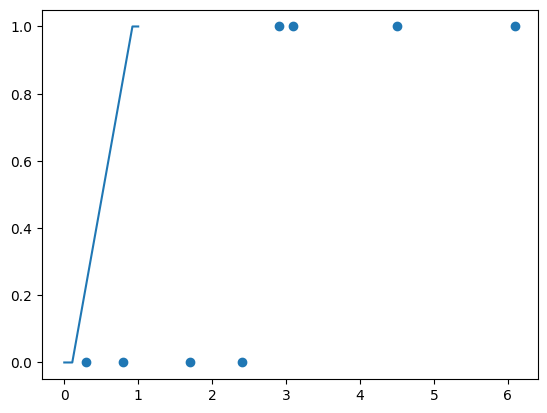

In [7]:
theta, h_x = gradient_descent_ndim(X, y, np.array([[0], [0]]), alpha, eps)
print(theta, h_x)
# h = calculate_cost(X, y, theta)
# print(h)
# colors = ['r' if val > boundary  else 'b' for val in cost]
plt.scatter(X[1].T, y.T)
h_x = h_fun(X, theta)
print(h_x)
plt.plot(h_x.T, y.T)

[[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
  1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
  3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
  5.4 5.5 5.6 5.7 5.8 5.9 6. ]]
[[3.40422893e-11 8.51189938e-11 2.12830666e-10 5.32159633e-10
  1.33060653e-09 3.32703503e-09 8.31888452e-09 2.08004540e-08
  5.20092419e-08 1.30043369e-07 3.25159055e-07 8.13023996e-07
  2.03287445e-06 5.08296309e-06 1.27092923e-05 3.17775792e-05
  7.94525477e-05 1.98638662e-04 4.96526109e-04 1.24058462e-03
  3.09618205e-03 7.70586466e-03 1.90474429e-02 4.63027647e-02
  1.08254298e-01 2.32856537e-01 4.31482625e-01 6.54898576e-01
  8.25935199e-01 9.22265597e-01 9.67389976e-01 9.86697724e-01


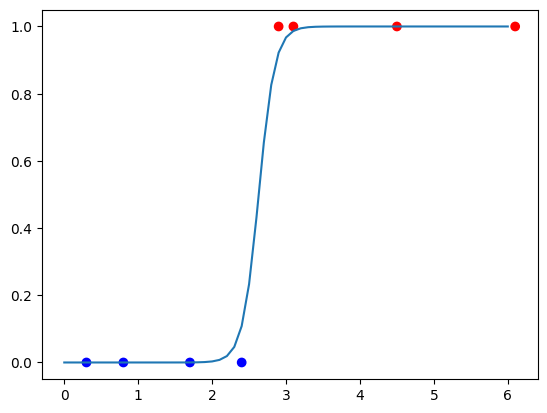

In [8]:

X = np.zeros((2, 61))
X[0, :] = 1
X[1, :] = np.linspace(0, 6, 61)
print(X)
h_x = h_fun(X, theta)
print(h_x)
i, j = np.unravel_index(np.argmax(X[1,:] > 0.5), X.shape)
plt.plot(X[1].T, h_x.T)
# print(h_x.tolist()[0])
kox = X[1, j]
print(kox)
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])
h_x = h_fun(X, theta)
colors = ['r' if val > 0.5  else 'b' for val in h_x.tolist()[0]]
plt.scatter(X[1].T, y.T, c=colors)

## Zadanie 2

In [9]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X.shape}')
print(f'{y.shape}')

(3, 100)
(1, 100)


C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


[30.05882245 31.05882245 32.05882245 33.05882245 34.05882245 35.05882245
 36.05882245 37.05882245 38.05882245 39.05882245 40.05882245 41.05882245
 42.05882245 43.05882245 44.05882245 45.05882245 46.05882245 47.05882245
 48.05882245 49.05882245 50.05882245 51.05882245 52.05882245 53.05882245
 54.05882245 55.05882245 56.05882245 57.05882245 58.05882245 59.05882245
 60.05882245 61.05882245 62.05882245 63.05882245 64.05882245 65.05882245
 66.05882245 67.05882245 68.05882245 69.05882245 70.05882245 71.05882245
 72.05882245 73.05882245 74.05882245 75.05882245 76.05882245 77.05882245
 78.05882245 79.05882245 80.05882245 81.05882245 82.05882245 83.05882245
 84.05882245 85.05882245 86.05882245 87.05882245 88.05882245 89.05882245
 90.05882245 91.05882245 92.05882245 93.05882245 94.05882245 95.05882245
 96.05882245 97.05882245 98.05882245 99.05882245]


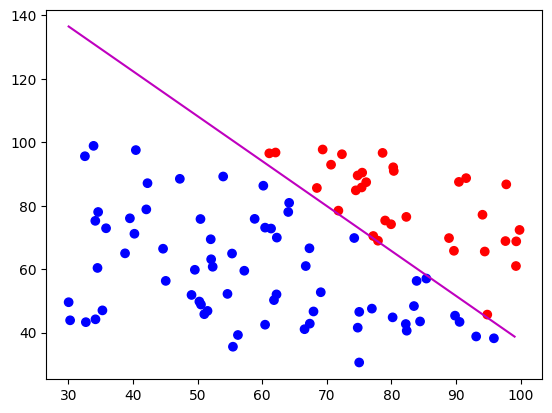

In [10]:
theta, h_x = gradient_descent_ndim(X, y, np.array([[0], [0], [0]]), alpha, eps)
# print(theta, h_x)
colors = ['r' if val > 0.5  else 'b' for val in h_x.tolist()[0]]
plt.scatter(X[1].T, X[2].T, c=colors)
h_x = h_fun(X, theta)
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db
print(x1_db)
plt.plot(x1_db, x2_db, '-m')

## Zadanie 3

In [11]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])

In [12]:
X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min[0] = 0
X_min.shape = [X_min.shape[0], 1]
X = (X - X_min) / (X_max - X_min)
print(X_min, X_max)

[[  0.        ]
 [ 30.05882245]
 [ 30.60326323]
 [903.53280688]] [[1.00000000e+00]
 [9.98278578e+01]
 [9.88694357e+01]
 [9.96560119e+03]]


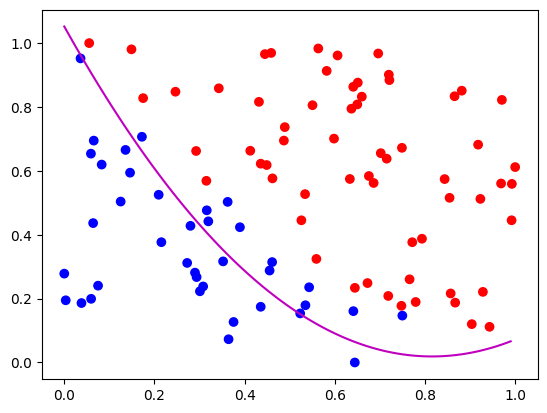

In [13]:
theta, h_x = gradient_descent_ndim(X, y, np.array([[0], [0], [0], [0]]), alpha, eps)
# print(theta, h_x)
colors = ['r' if val > 0.5  else 'b' for val in h_x.tolist()[0]]
plt.scatter(X[1].T, X[2].T, c=colors)
h_x = h_fun(X, theta)
# X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 0.01)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db -theta[3, 0]/theta[2, 0]*x1_db**2
plt.plot(x1_db, x2_db, '-m')

C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


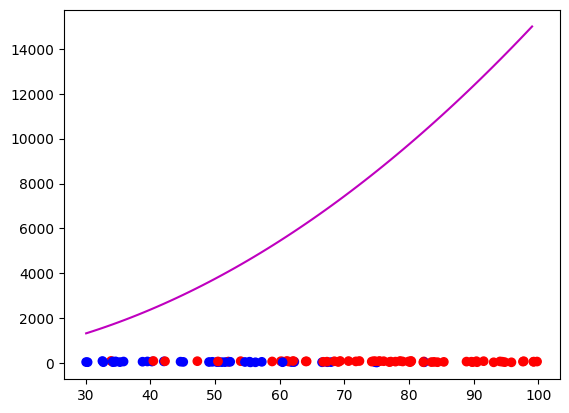

In [14]:
X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])
plt.scatter(X[1].T, X[2].T, c=colors)
h_x = h_fun(X, theta)
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db -theta[3, 0]/theta[2, 0]*x1_db**2
plt.plot(x1_db, x2_db, '-m')

## Zadanie 4

In [32]:
from sklearn import datasets
 
data = datasets.load_digits()
y = data['target']
x = data['data']
print(x)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [33]:
from sklearn.model_selection import train_test_split
 
x, x_test, y, y_test = train_test_split(x, y, random_state=1234)
print(x_test.shape, y.shape, x.shape)
m = x.shape[0]
n = x_test.shape[1]
o = x_test.shape[0]
print(m, n, o)

(450, 64) (1347,) (1347, 64)
1347 64 450


In [34]:
theta = []  # kontener na wagi kolejnych modeli
eps = 1e-5
alpha = 1e-1
no_of_cls=10
for cls_id in range(no_of_cls):
    print(f'Optymalizacja dla klasy {cls_id}')
    y_cls = (y == cls_id).astype(np.int8)  # utworzenie macierzy y dla klasy cls_id
    y_cls.shape = [1, m]
    x_tmp = np.array(x) / x.max()  # skalowanie danych, wystarczy podzielić przez maksymalną jasność w zbiorze
    X_cls = np.concatenate([np.ones((1, m)), x_tmp.T])  # utworzenie macierzy X
    theta_cls = np.zeros((n+1, 1)) 
 
    prev_cost = calculate_cost(X_cls, y_cls, theta_cls)
    while True:
        h_y_diff = (h_fun(X_cls, theta_cls) - y_cls)
        gradient = h_y_diff @ X_cls.T
        theta_cls = theta_cls - alpha * gradient.T / m

        
        cost = calculate_cost(X_cls, y_cls, theta_cls)
        if math.fabs(prev_cost - cost) < eps:
            break
        prev_cost = cost
    print(f'Koszt dla klasy {cls_id}: {cost}.')
    theta.append(theta_cls)

Optymalizacja dla klasy 0
Koszt dla klasy 0: 0.024743055732746197.
Optymalizacja dla klasy 1
Koszt dla klasy 1: 0.08141486444730639.
Optymalizacja dla klasy 2
Koszt dla klasy 2: 0.036362500141264006.
Optymalizacja dla klasy 3
Koszt dla klasy 3: 0.06487881876188531.
Optymalizacja dla klasy 4
Koszt dla klasy 4: 0.033733745397119375.
Optymalizacja dla klasy 5
Koszt dla klasy 5: 0.0450024368840984.
Optymalizacja dla klasy 6
Koszt dla klasy 6: 0.035760489919059446.
Optymalizacja dla klasy 7
Koszt dla klasy 7: 0.039499032809192605.
Optymalizacja dla klasy 8
Koszt dla klasy 8: 0.11012402472660782.
Optymalizacja dla klasy 9
Koszt dla klasy 9: 0.07943114602339718.


ValueError: setting an array element with a sequence.

In [37]:
probabs = np.zeros((no_of_cls, o))
for cls_id, theta_cls in enumerate(theta):
    x_example = np.array(x_test) /  x_test.max()
    X_example = np.concatenate([np.ones((1, o)), x_example.T])
    print((1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))))
    probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))
    
pred = np.argmax(probabs)
print(pred)

[[5.71866395e-04 8.88173821e-03 6.79406983e-04 1.32506274e-01
  6.07216854e-01 1.86249109e-03 6.16644018e-02 3.09839384e-03
  1.46010549e-03 8.96021056e-04 3.73626560e-04 1.85139669e-04
  1.62646682e-04 7.92925738e-02 1.05022780e-03 1.42679222e-03
  4.12690174e-03 6.56233656e-04 1.64932041e-03 2.37676784e-02
  9.78103051e-01 2.94735523e-02 3.29274558e-02 2.79908638e-04
  3.44608328e-03 2.83586582e-03 3.00695277e-02 9.43374636e-01
  1.70349284e-02 1.50354792e-01 3.79733871e-04 6.50853700e-02
  1.67329142e-05 6.03194676e-02 6.31482033e-04 8.13564619e-03
  6.02957560e-04 2.72886779e-02 2.21972468e-04 3.52199805e-03
  8.76453665e-03 1.78468502e-02 1.18686027e-02 8.60584501e-01
  1.09014866e-02 6.43985707e-04 5.24966420e-03 1.53357109e-02
  5.56690614e-04 3.21435165e-04 5.69709787e-03 5.70449587e-05
  4.21323123e-04 2.49213816e-03 2.17618328e-03 2.43113009e-03
  3.19317252e-01 1.01885966e-02 3.12113184e-04 9.11224357e-01
  7.31111030e-04 5.97750867e-05 1.10006721e-04 1.07235255e-03
  1.2952

In [48]:
for cls_idin in  range(no_of_cls):
    results = (probabs[cls_idin] > 0.5).astype(np.int8)
    print(np.count_nonzero(results & y_test)/o)

0.0
0.09555555555555556
0.0
0.08888888888888889
0.0
0.09777777777777778
0.0022222222222222222
0.09111111111111111
0.006666666666666667
0.09111111111111111


In [ ]:
[[37.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 44.  0.  0.  0.  0.  1.  0.  0.  2.]
 [ 0.  1. 47.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0. 43.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. 48.  0.  0.  2.  1.  0.]
 [ 0.  0.  0.  0.  1. 46.  1.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0. 43.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 40.  0.  0.]
 [ 0.  3.  1.  0.  0.  0.  1.  0. 37.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  3. 39.]]